## Import the Required Libraries

In [ ]:
import keras as keras
import pandas as pd
import numpy as np
import pathlib
import os,cv2,glob
import tensorflow as tf
from matplotlib import pyplot as plt
from skimage.io import imread
from matplotlib.pyplot import imshow, show
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from keras.applications.densenet import layers
from keras import Sequential
from dask import diagnostics, bag
from skimage.io import imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load the Data

Juptyer Notebook Assumption(s): This project assumes a top-level directory called **rice-diseases** located at **C:\rice-diseases** which contains the three subdirectories below (after zip file extraction):

**bacterial-leaf-blight**
**brown-spot**
**leaf-smut**

In [ ]:
data_dir = 'C:\\data\\rice-diseases'

In [ ]:
data_dir

'C:\\data\\rice-diseases'

In [ ]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('C:/data/rice-diseases')

In [ ]:
list(data_dir.glob("*DSC*.jpg"))

[]

In [ ]:
# Get the length of the bacterial leaf blight directory
bacteria=list(data_dir.glob("bacterial-leaf-blight\*"))
len(bacteria)

40

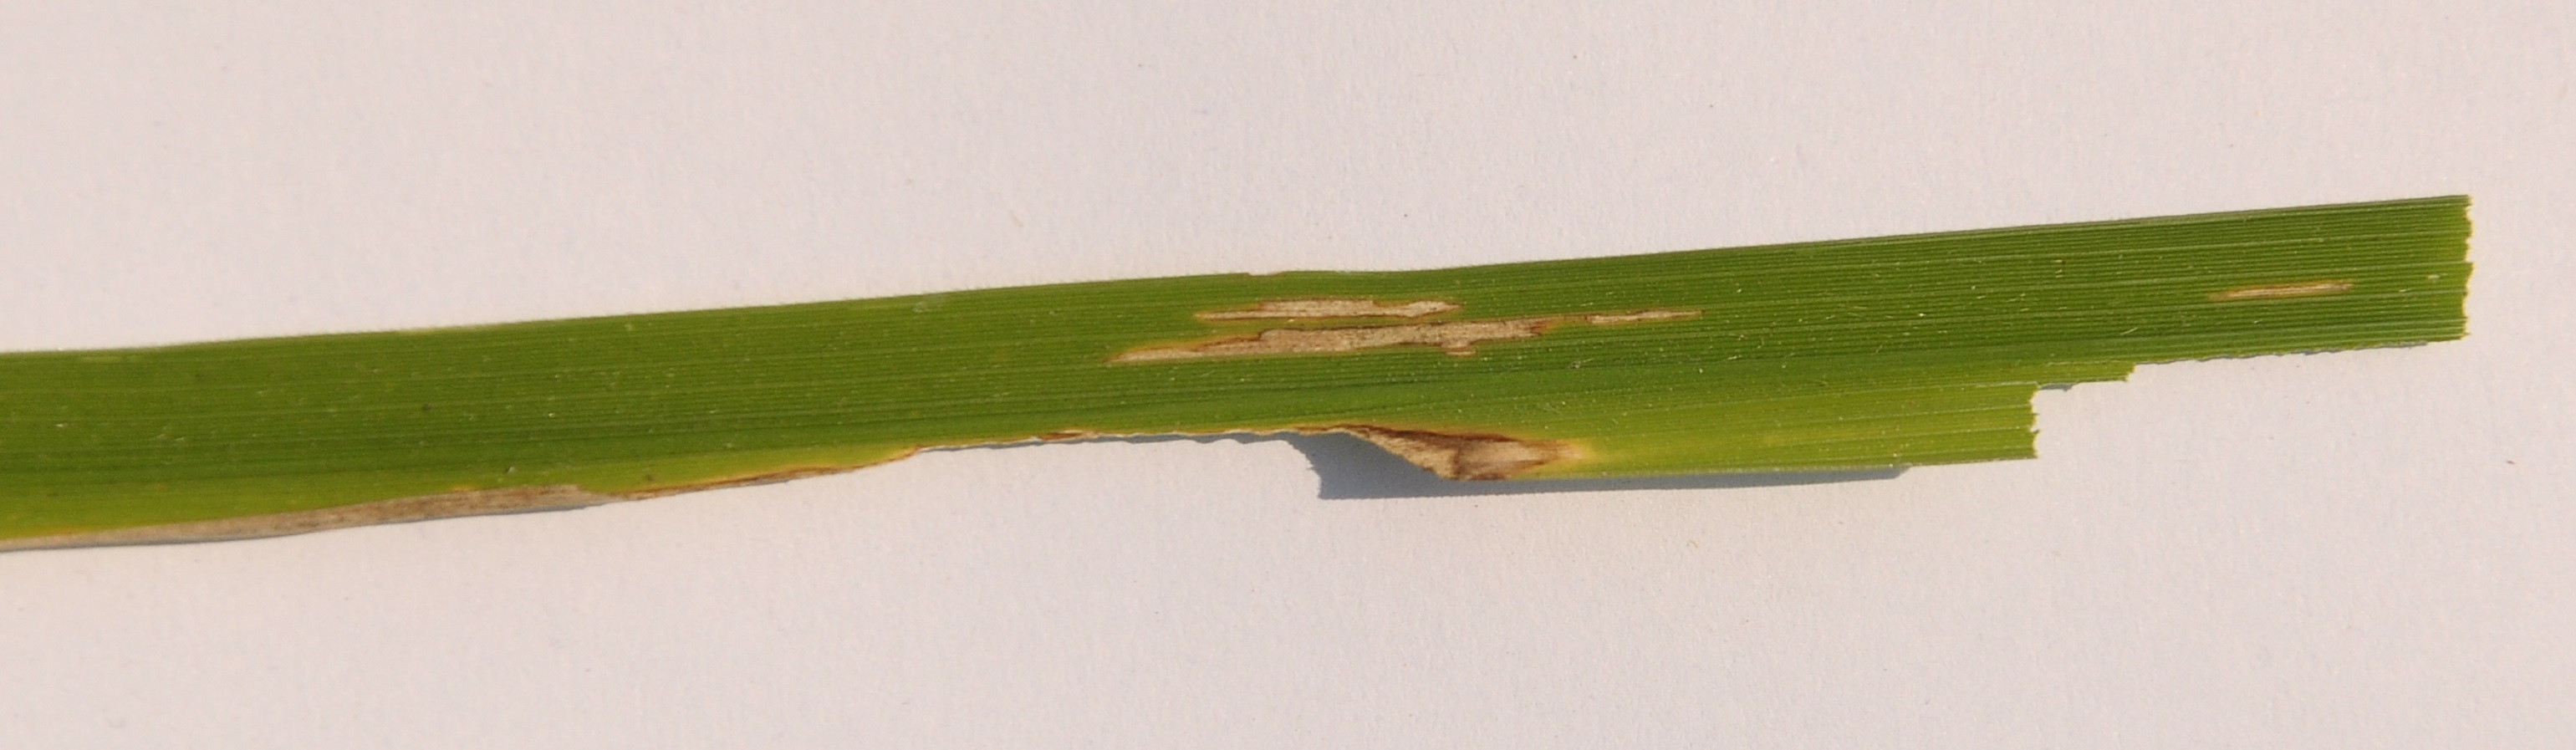

In [ ]:
# Display the first image from the bacterial leaf blight directory
PIL.Image.open(str(bacteria[0]))

In [ ]:
# Get the length of the brown spot directory
brown=list(data_dir.glob("brown-spot\*"))
len(brown)

40

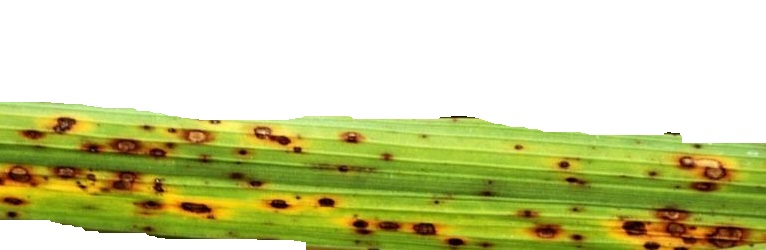

In [ ]:
# Display the first image from the brown spot directory
PIL.Image.open(str(brown[0]))

In [ ]:
# Get the length of the leaf smut directory
smut=list(data_dir.glob("leaf-smut\*"))
len(smut)

39

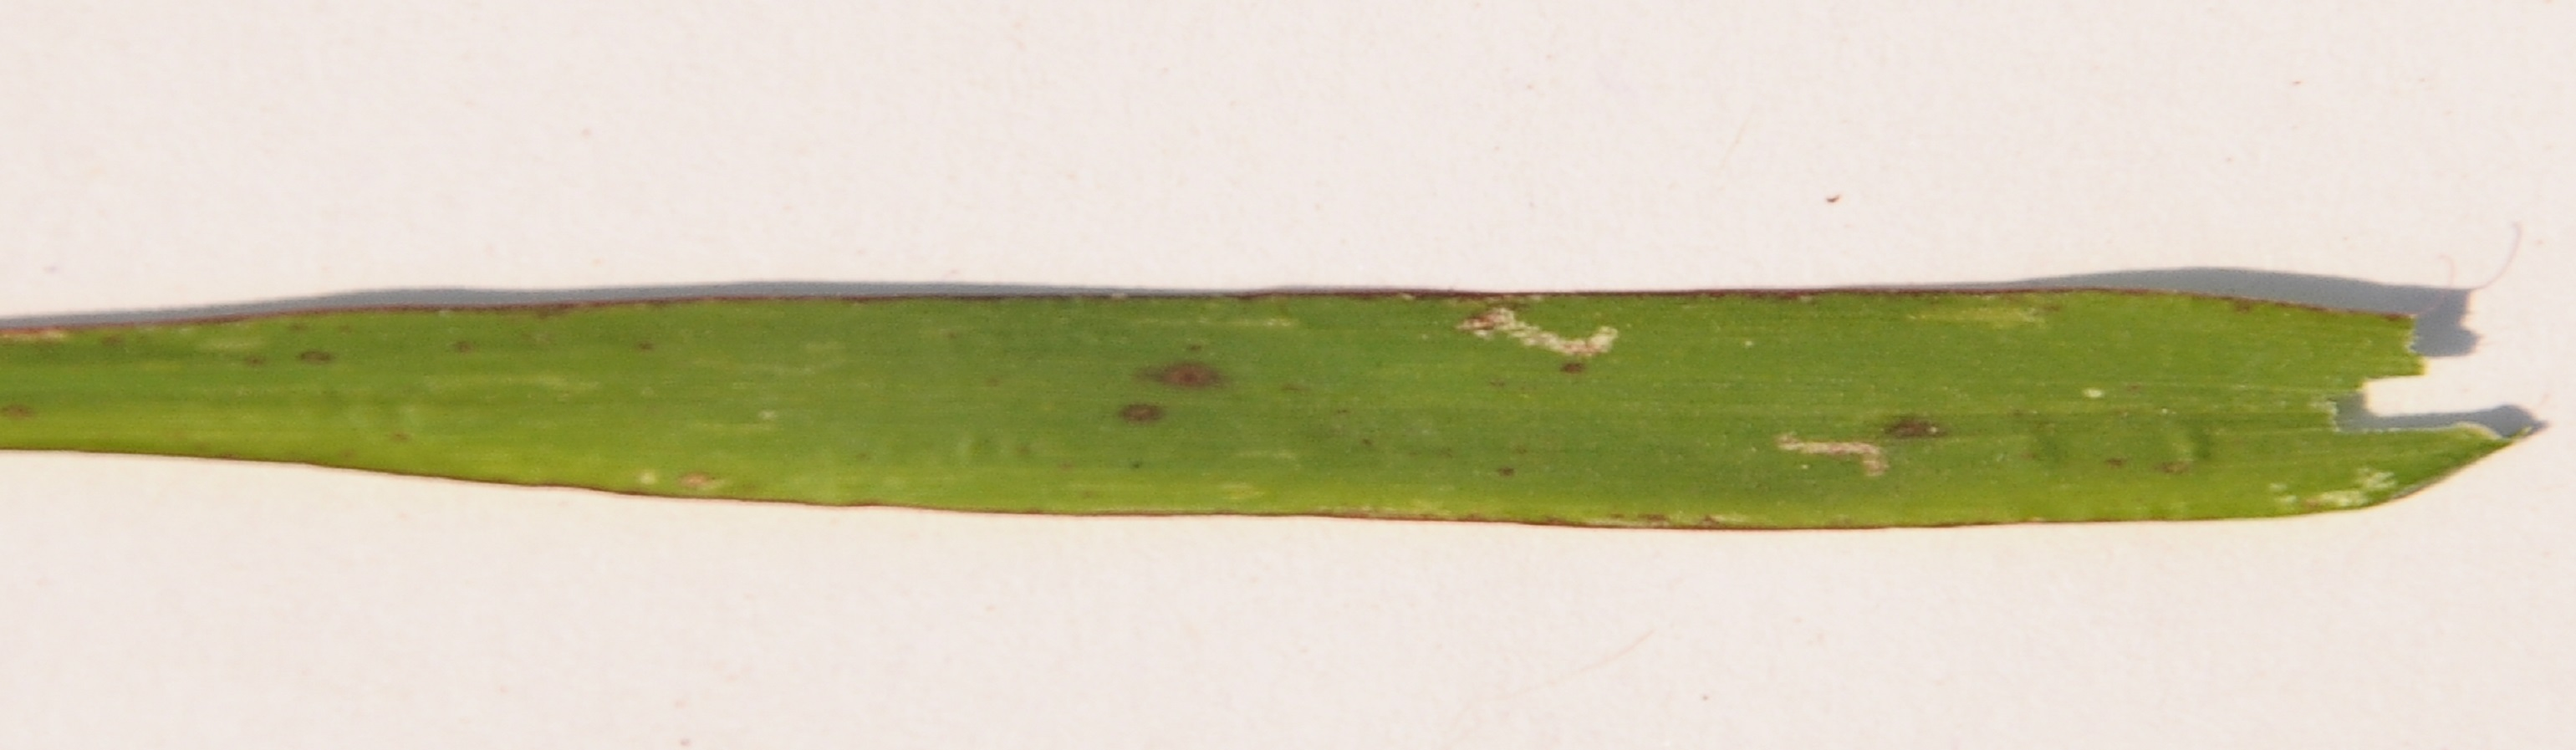

In [ ]:
# Display the first image from the leaf smut directory
PIL.Image.open(str(smut[0]))

### Exploratory Data Analysis (EDA)

In [ ]:
rice_disease_classes = {'bacterial-leaf-blight': len(bacteria),'brown-spot': len(brown),'leaf-smut': len(smut)}

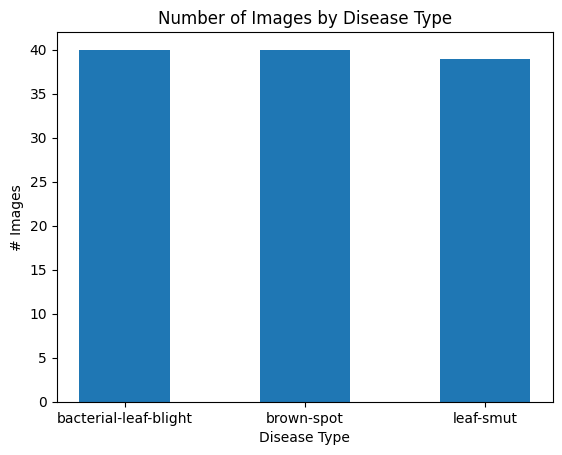

In [ ]:
plt.bar(rice_disease_classes.keys(), rice_disease_classes.values(), width = .5);plt.title("Number of Images by Disease Type");plt.xlabel('Disease Type');plt.ylabel('# Images');

In [ ]:
# Plot Image Size
directories = {'bacterial-leaf-blight': 'C:\\data\\bacterial-leaf-blight\\','brown-spot': 'C:\\data\\brown-spot\\', 'leaf-smut': 'C:\\data\\leaf-smut//'}

def get_dims(file):
    '''Returns dimensions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

[########################################] | 100% Completed | 3.47 ss
[########################################] | 100% Completed | 2.93 ss
[########################################] | 100% Completed | 2.82 ss


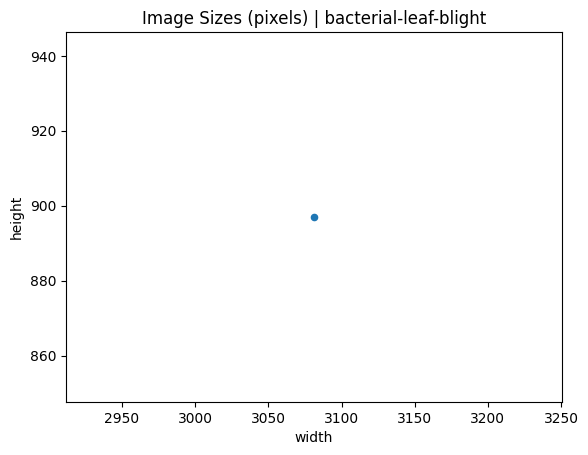

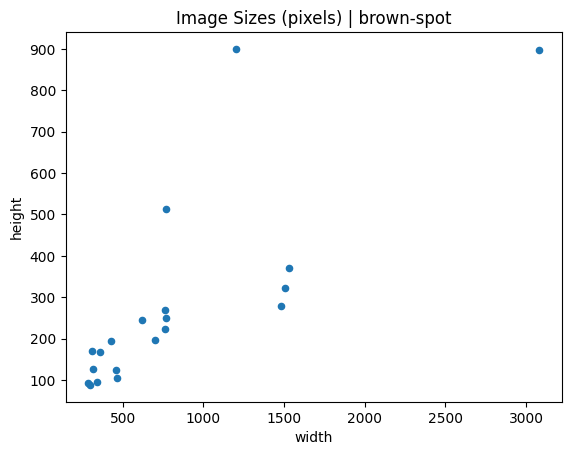

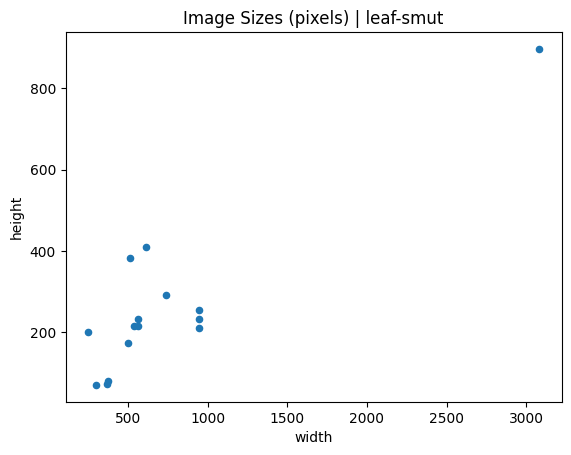

In [ ]:
for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

In [ ]:
# Create a dictionary for the labels
dict={"bacteria":list(data_dir.glob("bacterial-leaf-blight\*")),"brown":list(data_dir.glob("brown-spot\*")),"smut":list(data_dir.glob("leaf-smut\*"))}

In [ ]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
}

In [ ]:
str(dict["smut"][0])

'C:\\data\\rice-diseases\\leaf-smut\\DSC_0293.JPG'

In [ ]:
img=cv2.imread(str((dict["smut"][0])))

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
# Define/Create X and y
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
len(X_test)

30

In [ ]:
# Scaling
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 3
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 557ms/step - loss: 2.5235 - accuracy: 0.2584
Epoch 2/100
3/3 [==============================] - 2s 523ms/step - loss: 1.1745 - accuracy: 0.3034
Epoch 3/100
3/3 [==============================] - 2s 514ms/step - loss: 1.1123 - accuracy: 0.3596
Epoch 4/100
3/3 [==============================] - 2s 484ms/step - loss: 1.0918 - accuracy: 0.4045
Epoch 5/100
3/3 [==============================] - 1s 470ms/step - loss: 1.0219 - accuracy: 0.6629
Epoch 6/100
3/3 [==============================] - 1s 463ms/step - loss: 0.9357 - accuracy: 0.6180
Epoch 7/100
3/3 [==============================] - 1s 484ms/step - loss: 0.8623 - accuracy: 0.6292
Epoch 8/100
3/3 [==============================] - 2s 513ms/step - loss: 0.7957 - accuracy: 0.6404
Epoch 9/100
3/3 [==============================] - 3s 1s/step - loss: 0.7314 - accuracy: 0.7528
Epoch 10/100
3/3 [==============================] - 2s 619ms/step - loss: 0.6307 - accuracy: 0.7528
Epoch 11/100

In [ ]:
# Model Evaluation
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 351ms/step - loss: 1.8242 - accuracy: 0.7000


[1.8242456912994385, 0.699999988079071]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

1/1 [==============================] - 0s 194ms/step


array([[-17.726986  ,  19.96106   ,  -3.4402184 ],
       [ -5.760112  ,   3.3572412 ,  -1.3590286 ],
       [ -0.4464379 ,   1.6879287 ,  -1.9842901 ],
       [  9.711315  ,  -4.191511  ,  -1.3670743 ],
       [ -9.265599  ,  -2.8154945 ,   8.0919    ],
       [  8.665479  ,   5.8516073 , -11.545248  ],
       [  9.997183  ,  -3.5645533 ,  -2.4815426 ],
       [ 15.561678  ,   3.168467  , -12.743038  ],
       [ -0.5195081 ,   5.7372875 ,  -2.5570593 ],
       [ -4.1417804 ,   0.16869017,   0.9685604 ],
       [  8.814243  ,   3.8646545 ,  -9.590143  ],
       [-41.503098  ,   5.327815  ,  19.483446  ],
       [  3.1952293 ,  -3.4554944 ,   0.6782103 ],
       [  8.181212  ,   2.7417483 ,  -7.7092924 ],
       [-12.950591  ,   3.0687618 ,  17.899792  ],
       [ -4.848071  ,  -4.3291397 ,   5.9848676 ],
       [ 15.65966   ,  -1.7251458 ,  -7.528651  ],
       [-25.497866  ,   5.5839314 ,  14.47555   ],
       [  1.7070134 ,  -7.337835  ,   4.8336854 ],
       [ -5.233288  ,   6.53345

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

# Data Augmentation
<ul>
    <li>Data augmentation is the process of modifying, or “augmenting” a dataset with additional data.
<li>Techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

</ul>

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomFlip("horizontal")
    ]
)

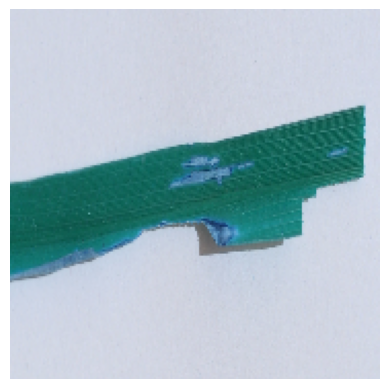

In [ ]:
plt.axis('off')
plt.imshow(X[0])

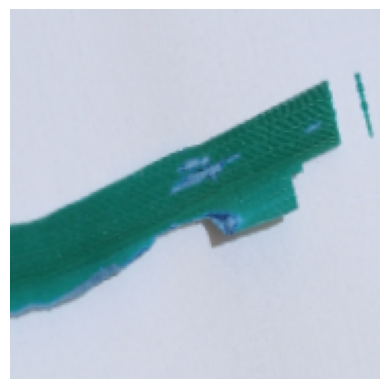

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 3

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=40)#%%


Epoch 1/40
3/3 [==============================] - 9s 658ms/step - loss: 1.3219 - accuracy: 0.4045
Epoch 2/40
3/3 [==============================] - 2s 635ms/step - loss: 1.1478 - accuracy: 0.3258
Epoch 3/40
3/3 [==============================] - 2s 650ms/step - loss: 0.9889 - accuracy: 0.4944
Epoch 4/40
3/3 [==============================] - 3s 952ms/step - loss: 0.9737 - accuracy: 0.5281
Epoch 5/40
3/3 [==============================] - 4s 1s/step - loss: 0.9331 - accuracy: 0.6067
Epoch 6/40
3/3 [==============================] - 3s 737ms/step - loss: 0.8195 - accuracy: 0.6966
Epoch 7/40
3/3 [==============================] - 2s 686ms/step - loss: 0.7167 - accuracy: 0.7191
Epoch 8/40
3/3 [==============================] - 2s 867ms/step - loss: 0.8037 - accuracy: 0.6629
Epoch 9/40
3/3 [==============================] - 2s 656ms/step - loss: 0.7772 - accuracy: 0.7079
Epoch 10/40
3/3 [==============================] - 2s 576ms/step - loss: 0.6278 - accuracy: 0.6966
Epoch 11/40
3/3 [=====

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 280ms/step - loss: 0.6631 - accuracy: 0.8333


[0.6631035208702087, 0.8333333134651184]

**The model accuracy after data augmentation is: 83%**